In [1]:
library(eulerr)

# Crea un esempio
fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Estrai i colori dei set
plot_data <- plot(fit, return_data = TRUE)

# Estrai i nomi delle aree e i rispettivi colori
colors_df <- data.frame(
  region = names(plot_data$fills$fill),
  color = unname(plot_data$fills$fill)
)

print(colors_df)


data frame with 0 columns and 0 rows


In [2]:
fit

,h,k,a,b,phi
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-1.208998,0,2.185097,2.185097,-2.664035
B,1.208998,0,2.185097,2.185097,-2.664035


In [3]:
library(eulerr)

# Crea un fit di esempio
fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Disegna il plot e cattura l'oggetto grafico invisibile
grob_obj <- plot(fit, quantities = TRUE, labels = TRUE)

# Estrai i colori (fill) dalle "fills" contenute nel fit stesso
fills <- fit$fills$fill

# Assegna i nomi dei set
names(fills) <- names(fit$original.values)

# Mostra i colori assegnati
print(fills)


ERROR: Error in names(fills) <- names(fit$original.values): attempt to set an attribute on NULL


In [4]:
library(eulerr)
library(grid)
library(gridExtra)

# Crea il fit
fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Cattura il grob del plot (non lo disegna ancora)
g <- plot(fit, quantities = TRUE, labels = TRUE)

# Lista dei grob presenti
grid.ls(g)

# Estrai i "fill" dai poligoni (le aree Venn)
fills <- lapply(g$children, function(child) {
  if (!is.null(child$gp$fill)) return(child$gp$fill) else return(NULL)
})

# Filtra solo quelli non nulli
fills <- Filter(Negate(is.null), fills)

# Mostra i colori effettivamente usati
print(fills)


euler.diagram
  canvas.grob
    diagram.grob.1
      fills.grob.1
      fills.grob.2
      fills.grob.3
      edges.grob
      tags
        tag.number.1
          tag.label.1
          tag.quantity.1
        tag.number.2
          tag.label.2
          tag.quantity.2
        tag.number.3
          GRID.null.4
          tag.quantity.3
named list()


In [5]:
library(eulerr)
library(grid)

# Crea il fit
fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Crea il grob (senza disegnarlo) e salva
g <- plot(fit, quantities = TRUE, labels = TRUE)

# Naviga fino ai fills.grob.*
fills_grobs <- g$children$diagram.grob.1$children[grep("fills.grob", names(g$children$diagram.grob.1$children))]

# Estrai i colori (fill) da ciascun grob
fills_colors <- sapply(fills_grobs, function(x) x$gp$fill)

# Mostra i colori usati nei cerchi/intersezioni
print(fills_colors)


list()


list()


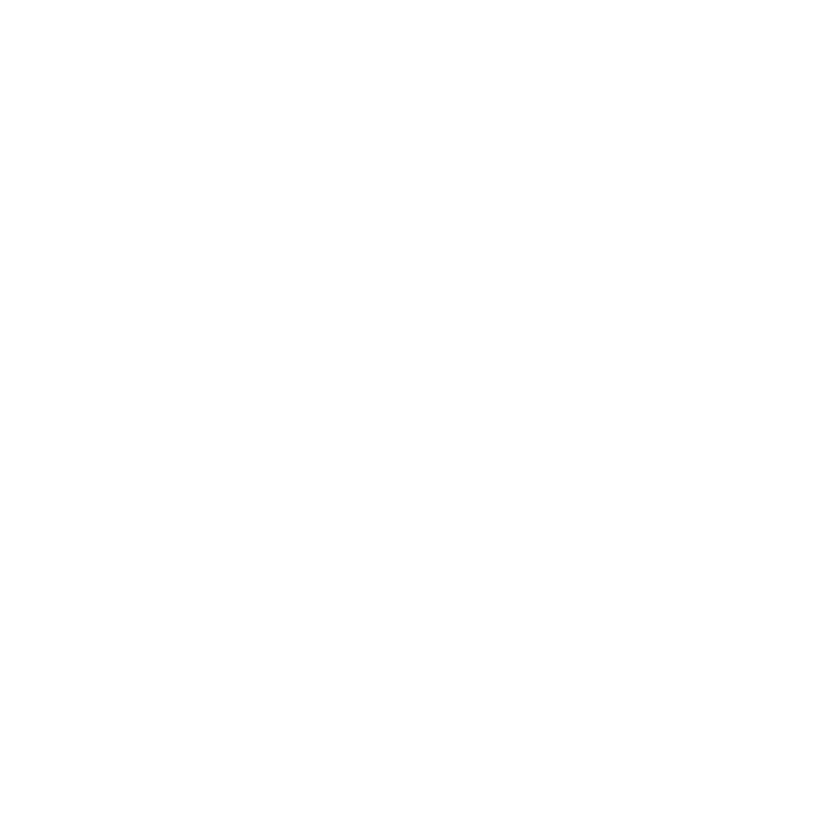

In [6]:
library(eulerr)
library(grid)

# Crea il fit
fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Crea il grob e forza la costruzione completa
g <- plot(fit, quantities = TRUE, labels = TRUE)
g_forced <- grid.force(g)

# Naviga nel grob forzato
diagram_grob <- g_forced$children$diagram.grob.1

# Estrai i "fills.grob.*"
fills_grobs <- diagram_grob$children[grep("fills.grob", names(diagram_grob$children))]

# Estrai i colori dai fill grobs
fills_colors <- sapply(fills_grobs, function(x) x$gp$fill)

# Mostra i colori
print(fills_colors)


png 
  2

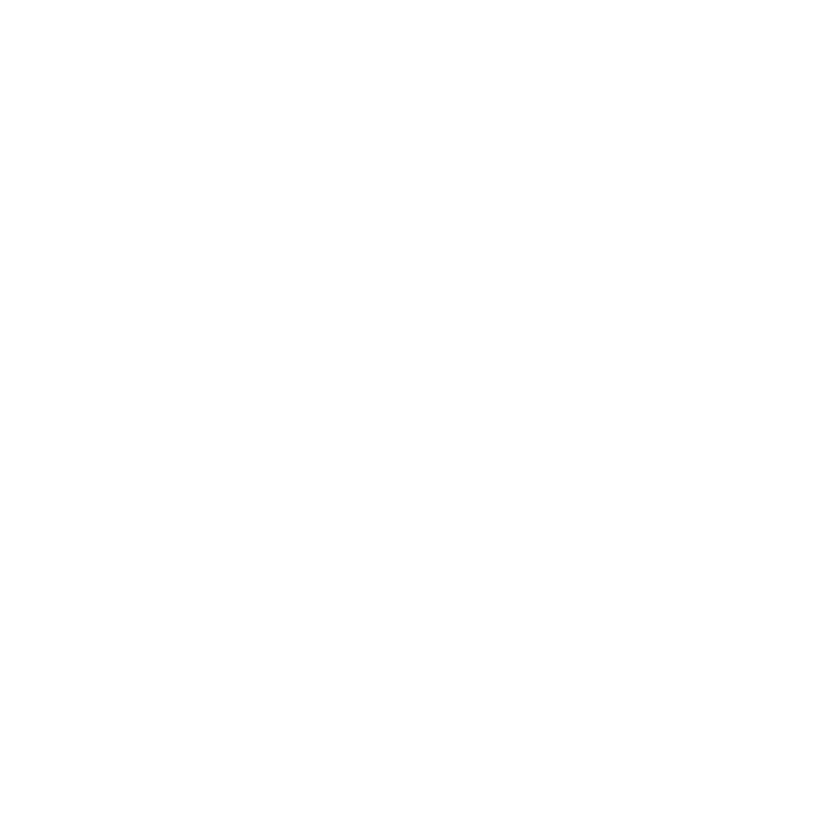

In [7]:
library(eulerr)
library(grid)

# Fit eulerr
fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Crea e forza il grob
g <- plot(fit, quantities = TRUE, labels = TRUE)
g_forced <- grid.force(g)

# Salva il PDF manualmente
pdf("venn_test.pdf", width = 5, height = 5)
grid.draw(g_forced)
dev.off()


In [8]:
fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Gli elementi individuali
ellipses <- fit$ellipses

# Estrai i nomi dei set
names(ellipses)

# Ma i colori NON sono qui: vanno forzati con rendering + introspezione low-level


[1] "h"   "k"   "a"   "b"   "phi"

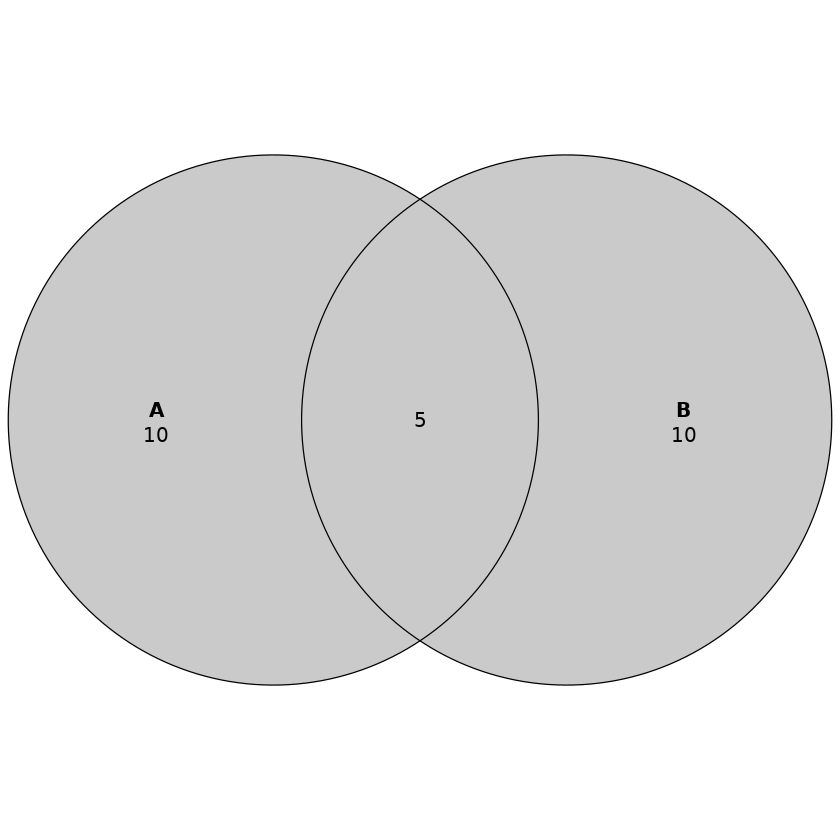

In [9]:
library(eulerr)

fit <- euler(c(A = 10, B = 10, "A&B" = 5))

# Imposta manualmente dei grigi
gray_vals <- c("grey70", "grey70")

plot(fit,
     fills = list(fill = gray_vals, alpha = 0.7),
     quantities = TRUE,
     labels = TRUE)


In [11]:
library(ggplot2)

# Definisci i dati per i centri dei cerchi
circle_data <- data.frame(
  x = c(1, 3, 5),
  y = c(1, 1, 1),
  fill = c("grey60", "grey75", "grey90")  # tre livelli di grigio
)

# Crea il plot
plot_obj <- ggplot(circle_data, aes(x, y)) +
  geom_point(aes(fill = fill), shape = 21, size = 60, stroke = 0) +
  scale_fill_identity() +
  coord_fixed() +
  theme_void()

# Salva il PDF
ggsave("Three_Separate_Gray_Circles.pdf",
       plot = plot_obj,
       width = 6, height = 2.5, device = cairo_pdf)


In [12]:
library(eulerr)

# Definisci tre insiemi senza intersezioni
fit <- euler(c(A = 10, B = 10, C = 10))

# Definisci tre grigi distinti
gray_colors <- c("grey60", "grey75", "grey90")

# Fai il plot con i colori grigi e alpha costante
plot_obj <- plot(fit,
                 fills = list(fill = gray_colors, alpha = 1),
                 quantities = FALSE,
                 labels = FALSE,
                 edges = FALSE,
                 main = "Tre insiemi separati in scala di grigi")

# Salva il PDF con il plot
pdf("Three_Gray_Sets_eulerr.pdf", width = 5, height = 5)
grid::grid.draw(plot_obj)
dev.off()


png 
  2

In [18]:
library(eulerr)
library(grid)

# Tre insiemi separati
fit <- euler(c(A = 10, B = 10, C = 10))

# Tre toni di grigio
gray_colors <- c("grey10", "grey75", "grey95")

# Plot con contorno nero
plot_obj <- plot(fit,
                 fills = list(fill = gray_colors, alpha = 1),
                 edges = list(col = "black"),
                 quantities = FALSE,
                 labels = FALSE,
                 main = "Tre insiemi separati - grigio con bordo nero")

# Salva il PDF
pdf("Three_Gray_Sets_with_Border4.pdf", width = 5, height = 5)
grid.draw(plot_obj)
dev.off()


png 
  2